In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In this phase we import the data required for the analysis.

In [2]:
data_folder = './wiki_pageviews_covid/data/'
file_name = 'Global_Mobility_Report.csv'
df = pd.read_csv(data_folder + file_name)

C:\Users\digen\AppData\Local\Temp\ipykernel_2000\3031030807.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_folder + file_name)


Now we move on a briefly analysis on what dataframe contains.

In [3]:
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [4]:
df.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

**Q**: Which countries are involved in the data we have?

In [5]:
df['country_region'].unique()

array(['United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda',
       'Angola', 'Argentina', 'Austria', 'Australia', 'Aruba',
       'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium',
       'Burkina Faso', 'Bulgaria', 'Bahrain', 'Benin', 'Bolivia',
       'Brazil', 'The Bahamas', 'Botswana', 'Belarus', 'Belize', 'Canada',
       'Switzerland', "Côte d'Ivoire", 'Chile', 'Cameroon', 'Colombia',
       'Costa Rica', 'Cape Verde', 'Czechia', 'Germany', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Estonia', 'Egypt', 'Spain',
       'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Greece', 'Guatemala', 'Guinea-Bissau', 'Hong Kong',
       'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'Ireland',
       'Israel', 'India', 'Iraq', 'Italy', 'Jamaica', 'Jordan', 'Japan',
       'Kenya', 'Kyrgyzstan', 'Cambodia', 'South Korea', 'Kuwait',
       'Kazakhstan', 'Laos', 'Lebanon', 'Liechtenstein', 'Sri Lanka',
       'Lithuania', '

It is required to transform the data type of **df['date']** column to have the possibility to work with dates correctly

In [6]:
df['date'] = pd.to_datetime(df['date'])

For disaggregate analysis of data and for further steps of our project we concluded that it could be useful to divide the df on continents.

In [7]:
Europe = ['Austria','Bosnia and Herzegovina',  'Belgium', 'Bulgaria', 'Belarus',  'Switzerland',  'Czechia', 'Germany',
          'Denmark','Estonia',  'Spain','Finland', 'France',  'United Kingdom', 'Georgia', 'Greece',  'Croatia',
          'Hungary',  'Ireland','Israel',  'Italy',  'Liechtenstein', 'Lithuania', 'Luxembourg', 'Latvia',  'Moldova', 
           'North Macedonia',   'Malta', 'Netherlands', 'Norway', 'Poland',  'Portugal', 'Romania', 'Serbia', 
          'Sweden',  'Slovenia', 'Slovakia',  'Turkey', 'Ukraine']

Asia = [ 'Afghanistan', 'Angola', 'Bangladesh', 'Bahrain', 'Hong Kong','Indonesia','India', 'Iraq','Jordan', 'Japan',
        'Kyrgyzstan', 'Cambodia', 'South Korea', 'Kuwait','Kazakhstan', 'Laos','Sri Lanka','Myanmar (Burma)', 'Mongolia',
         'Malaysia', 'Nepal','Oman', 'Pakistan','Qatar','Russia','Saudi Arabia','Singapore','Thailand','Tajikistan', 
         'Taiwan','Vietnam', 'Yemen']

America = ['United Arab Emirates','Antigua and Barbuda','Argentina', 'Aruba','Barbados', 'Bolivia','Brazil', 'The Bahamas', 'Belize',
           'Canada', 'Chile','Colombia','Costa Rica','Dominican Republic', 'Ecuador','Guatemala','Honduras','Haiti','Jamaica',
           'Mauritius', 'Mexico','Nicaragua','Peru', 'Philippines','Puerto Rico','Paraguay','El Salvador','Trinidad and Tobago'
           'United States', 'Uruguay','Venezuela', 'Panama']

Africa = ['Burkina Faso', 'Benin', 'Botswana',  "Côte d'Ivoire", 'Cameroon', 'Cape Verde', 'Egypt','Gabon', 'Ghana', 
          'Guinea-Bissau','Kenya','Lebanon','Libya', 'Morocco','Mali','Mozambique', 'Namibia','Niger', 'Nigeria', 
           'Papua New Guinea','Rwanda','Senegal',  'Togo', 'Tanzania','Uganda','South Africa', 'Zambia','Zimbabwe','Réunion']

Oceania = ['Australia', 'Fiji', 'New Zealand',]

In [8]:
#creating a dataset for each continent
df_europe = df.loc[df['country_region'].isin(Europe)]
df_asia = df.loc[df['country_region'].isin(Asia)]
df_africa = df.loc[df['country_region'].isin(Africa)]
df_america = df.loc[df['country_region'].isin(America)]
df_oceania = df.loc[df['country_region'].isin(Oceania)]

In [9]:
df_europe.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
83020,AT,Austria,NaN,NaN,NaN,NaN,NaN,2020-02-15,9.0,1.0,42.0,13.0,0.0,-2.0
83021,AT,Austria,NaN,NaN,NaN,NaN,NaN,2020-02-16,15.0,21.0,42.0,12.0,1.0,-2.0
83022,AT,Austria,NaN,NaN,NaN,NaN,NaN,2020-02-17,9.0,5.0,35.0,3.0,-4.0,0.0
83023,AT,Austria,NaN,NaN,NaN,NaN,NaN,2020-02-18,8.0,5.0,40.0,2.0,-4.0,0.0
83024,AT,Austria,NaN,NaN,NaN,NaN,NaN,2020-02-19,4.0,2.0,10.0,-1.0,-5.0,1.0


Following we did an example of what we did to start understanding what dataframes were describing

In [10]:
df_europe['retail_and_recreation_percent_change_from_baseline'].describe()

count    472661.000000
mean        -22.838923
std          35.279180
min        -100.000000
25%         -50.000000
50%         -17.000000
75%           1.000000
max         545.000000
Name: retail_and_recreation_percent_change_from_baseline, dtype: float64

Given the fact that we would like to start with an analysis on continents, for each country we selected the aggregate data for each country. In the dataframe infact, there are the aggregated data (*sub_region_1=NaN, sub_region_2=NaN, metro_area=NaN*) but there are also disaggregated data that for this step we decided to neglect.

In [11]:
#select only the aggregate data for each country in each continent

df_europe_new = df_europe.loc[(df['sub_region_1'].isna())&(df['sub_region_2'].isna())&(df['metro_area'].isna())]
df_asia_new = df_asia.loc[(df['sub_region_1'].isna())&(df['sub_region_2'].isna())&(df['metro_area'].isna())]
df_america_new = df_america.loc[(df['sub_region_1'].isna())&(df['sub_region_2'].isna())&(df['metro_area'].isna())]
df_oceania_new = df_oceania.loc[(df['sub_region_1'].isna())&(df['sub_region_2'].isna())&(df['metro_area'].isna())]
df_africa_new = df_africa.loc[(df['sub_region_1'].isna())&(df['sub_region_2'].isna())&(df['metro_area'].isna())]

**HANDLING MISSING VALUES**: Before starting to plot to have an understanding on how metrics behave on different countries, we handle missing values.  
We decided to remove for each continent the countries with more than 30 NaN (i.e. more than 1 month of observations are missing) and we did this for each category.  
For countries with <30 NaN for a given category, we decided to fill the NaN with the *ffill method*. For us it was a good way to use this method because we do not expect a very huge difference from consecutive days (and even if there will be, it will be captured from the first date without NaN).

**PREPARING THE PLOT**: After having all the datasets of continents without missing values we computed the for each date the mean of all the metrics we have because it is what we would like to plot.

**PLOTTING**: for each metrics (columns in df) we have plotted the mean of the metric for all continents in order to see if those metrics have different behavior in different continents


C:\Users\digen\AppData\Local\Temp\ipykernel_2000\2594760986.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_europe_new['to remove '+cat]=np.zeros(df_europe_new.shape[0])
C:\Users\digen\AppData\Local\Temp\ipykernel_2000\2594760986.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia_new['to remove '+cat]=np.zeros(df_asia_new.shape[0])
C:\Users\digen\AppData\Local\Temp\ipykernel_2000\2594760986.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

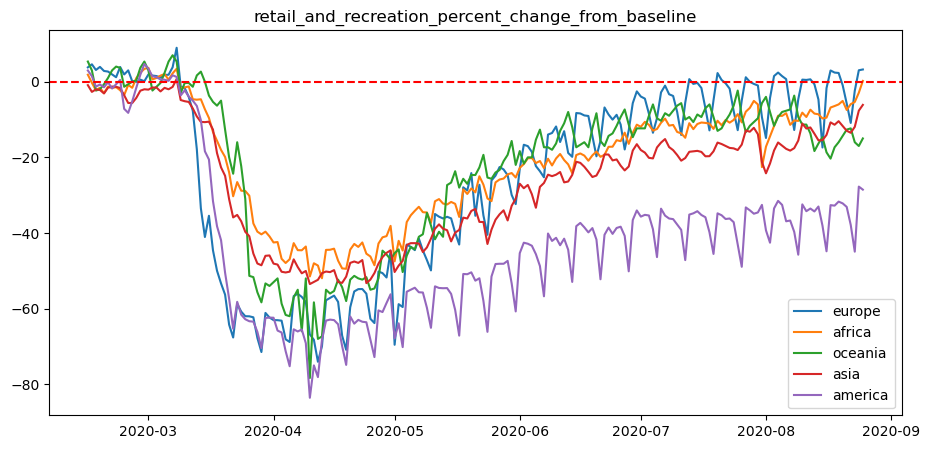

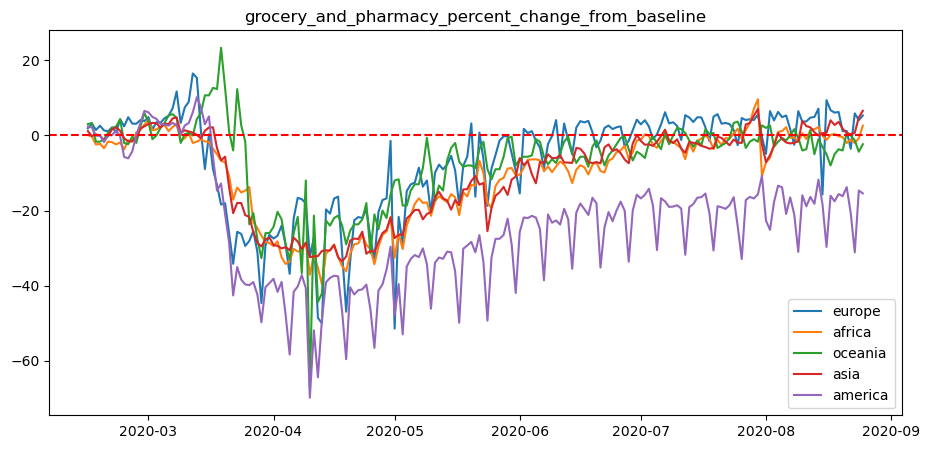

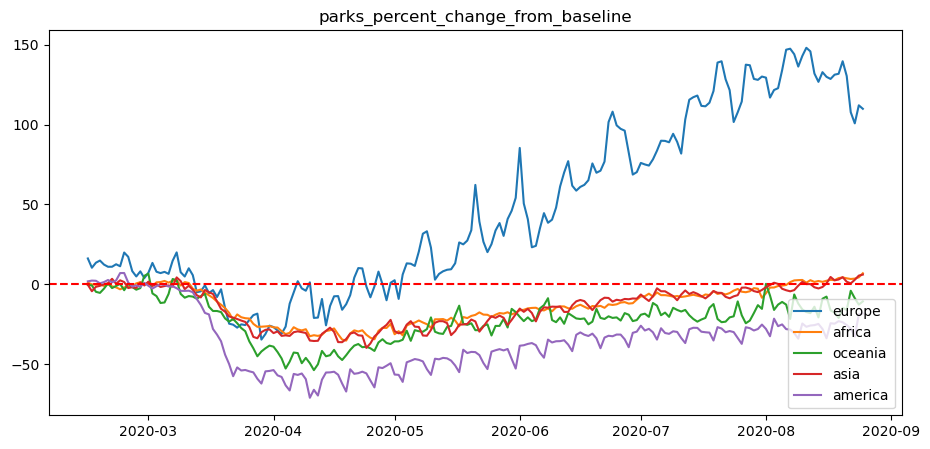

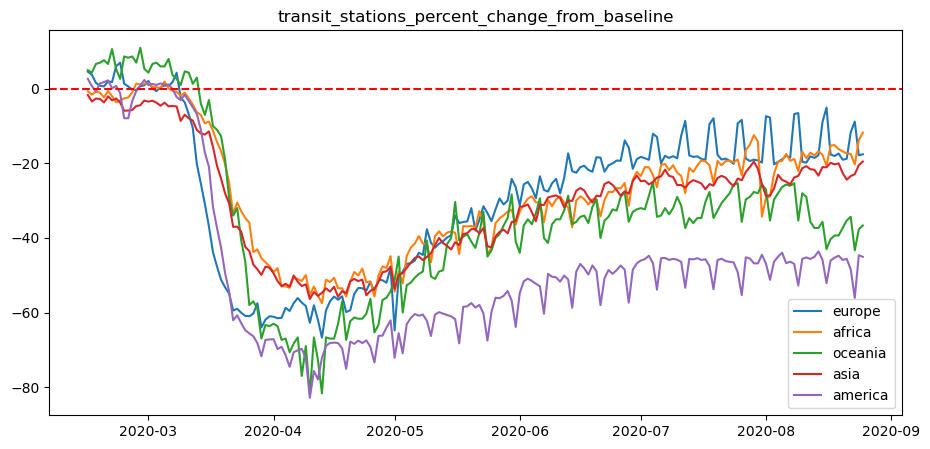

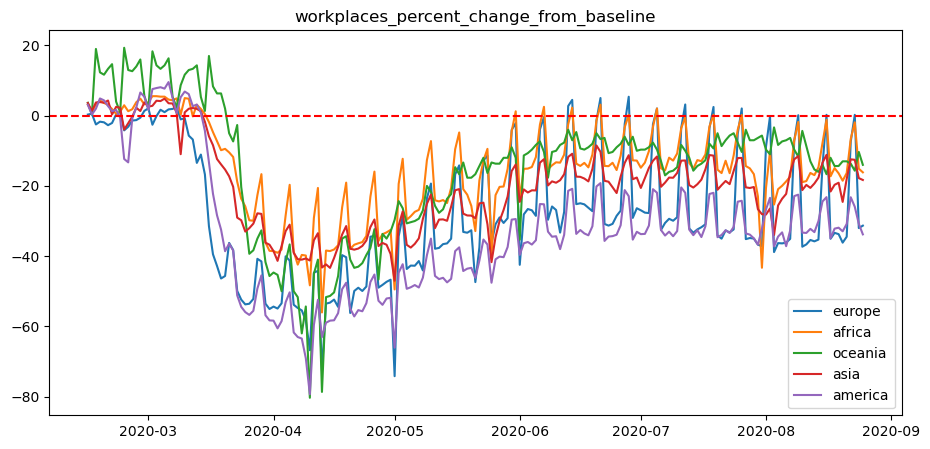

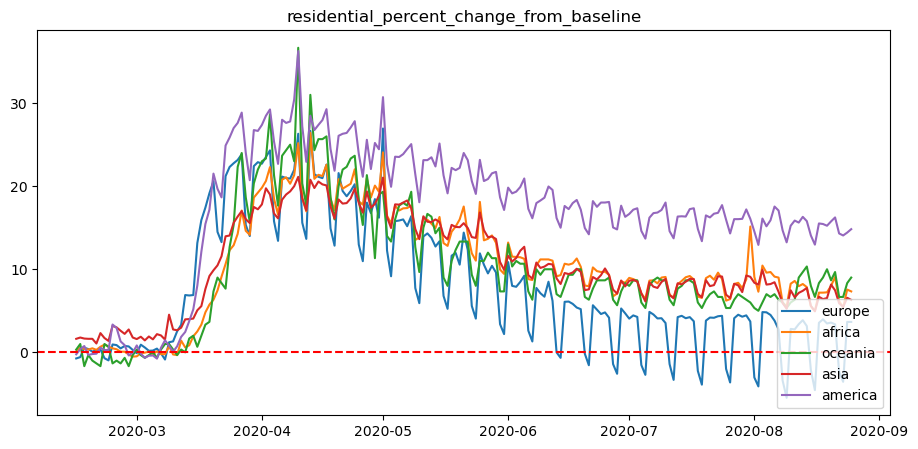

In [12]:
#AGGREGATE ANALYSIS OF CONTINENTS

for cat in df.columns[-6:]:
    #for each continent I am removing countries with >treshold  nan (missing more than 1 month of observations) in category=cat 
    treshold = 30
    
    #HANDLING MISSING VALUES 
    df_europe_new['to remove '+cat]=np.zeros(df_europe_new.shape[0])
    for country in df_europe_new['country_region'].unique():
        nan = np.sum(df_europe_new.loc[df_europe_new['country_region']==country, cat].isna())
        if nan > treshold:
            df_europe_new.loc[df_europe_new['country_region']==country,'to remove '+cat] = 1
    cat_1eu = df_europe_new.loc[df_europe_new['to remove '+cat] == 0]
           
    df_asia_new['to remove '+cat]=np.zeros(df_asia_new.shape[0])
    for country in df_asia_new['country_region'].unique():
        nan = np.sum(df_asia_new.loc[df_asia_new['country_region']==country, cat].isna())
        if nan > treshold:
            df_asia_new.loc[df_asia_new['country_region']==country,'to remove '+cat] = 1
    cat_1as = df_asia_new.loc[df_asia_new['to remove '+cat] == 0]
           
    df_america_new['to remove '+cat]=np.zeros(df_america_new.shape[0])
    for country in df_america_new['country_region'].unique():
        nan = np.sum(df_america_new.loc[df_america_new['country_region']==country, cat].isna())
        if nan > treshold:
            df_america_new.loc[df_america_new['country_region']==country,'to remove '+cat] = 1
    cat_1am = df_america_new.loc[df_america_new['to remove '+cat] == 0]
           
    df_africa_new['to remove '+cat]=np.zeros(df_africa_new.shape[0])
    for country in df_africa_new['country_region'].unique():
        nan = np.sum(df_africa_new.loc[df_africa_new['country_region']==country, cat].isna())
        if nan > treshold:
            df_africa_new.loc[df_africa_new['country_region']==country,'to remove '+cat] = 1
    cat_1af = df_africa_new.loc[df_africa_new['to remove '+cat] == 0]
           
    df_oceania_new['to remove '+cat]=np.zeros(df_oceania_new.shape[0])
    for country in df_oceania_new['country_region'].unique():
        nan = np.sum(df_oceania_new.loc[df_oceania_new['country_region']==country, cat].isna())
        if nan > treshold:
            df_oceania_new.loc[df_oceania_new['country_region']==country,'to remove '+cat] = 1
    cat_1oc = df_oceania_new.loc[df_oceania_new['to remove '+cat] == 0]
           
    #FILLING
    cat_1eu = cat_1eu[['date', cat]].fillna(method='ffill')
    cat_1af = cat_1af[['date', cat]].fillna(method='ffill')
    cat_1oc = cat_1oc[['date', cat]].fillna(method='ffill')
    cat_1as = cat_1as[['date', cat]].fillna(method='ffill')
    cat_1am = cat_1am[['date', cat]].fillna(method='ffill')
    
    #MEANS OF DATA WITHOUT NaN (over a given day)
    means_eu = cat_1eu.groupby('date').apply(lambda x: x.mean())
    means_am = cat_1am.groupby('date').apply(lambda x: x.mean())
    means_af = cat_1af.groupby('date').apply(lambda x: x.mean())
    means_oc = cat_1oc.groupby('date').apply(lambda x: x.mean())
    means_as = cat_1as.groupby('date').apply(lambda x: x.mean())
    
    #PLOTTING
    fig = plt.figure(figsize = (11,5))

    plt.plot(means_eu, label = 'europe')
    plt.plot(means_af, label = 'africa')
    plt.plot(means_oc, label = 'oceania')
    plt.plot(means_as, label = 'asia')
    plt.plot(means_am, label = 'america')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.legend(loc = 'lower right', fontsize = 10)
    plt.title(cat)

Now we move on an analysis of World Health Organization data. We would like to start exploring if there is a similar behavior in infections trend and the trend of some of the topics cliccked in wiki. In this way we can evaluate what people are interested in at different time (and so different severity) of pandemimcs

In [13]:
data_folder = './wiki_pageviews_covid/data/'
file_name = 'WHO-COVID-19-global-data.csv'
WHO_df = pd.read_csv(data_folder + file_name)

In [14]:
WHO_df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [15]:
type(WHO_df['Date_reported'])

pandas.core.series.Series

As we did for the previous dataframe, we change the type of date in order to have the correct type for them to properly work with

In [16]:
WHO_df['Date_reported'] = pd.to_datetime(WHO_df['Date_reported'])

We start by analysing what happened for Italy, country from where to of us came from.

In [48]:
df_italy = WHO_df.loc[WHO_df['Country_code']=='IT']
df_serbia = WHO_df.loc[WHO_df['Country_code']=='RS']

df_italy_riky = df_italy.loc[(df_italy['Date_reported']>='2020-02-20') & (df_italy['Date_reported']<='2020-03-20')]
df_serbia_riky = df_serbia.loc[(df_serbia['Date_reported']>='2020-02-20') & (df_serbia['Date_reported']<='2020-03-20')]

In [49]:
df_serbia_riky.head(-1)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
198408,2020-02-20,RS,Serbia,EURO,0,0,0,0
198409,2020-02-21,RS,Serbia,EURO,0,0,0,0
198410,2020-02-22,RS,Serbia,EURO,0,0,0,0
198411,2020-02-23,RS,Serbia,EURO,0,0,0,0
198412,2020-02-24,RS,Serbia,EURO,0,0,0,0
198413,2020-02-25,RS,Serbia,EURO,0,0,0,0
198414,2020-02-26,RS,Serbia,EURO,0,0,0,0
198415,2020-02-27,RS,Serbia,EURO,0,0,0,0
198416,2020-02-28,RS,Serbia,EURO,0,0,0,0
198417,2020-02-29,RS,Serbia,EURO,0,0,0,0


To do comparison with wiki data, we select on WHO dataframe only the data on the time interval we have data of wikipedia clicks (last data is on 2020-07-31)

In [19]:
df_italy.head(-1)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
107532,2020-01-03,IT,Italy,EURO,0,0,0,0
107533,2020-01-04,IT,Italy,EURO,0,0,0,0
107534,2020-01-05,IT,Italy,EURO,0,0,0,0
107535,2020-01-06,IT,Italy,EURO,0,0,0,0
107536,2020-01-07,IT,Italy,EURO,0,0,0,0
...,...,...,...,...,...,...,...,...
108570,2022-11-06,IT,Italy,EURO,0,23642011,0,179436
108571,2022-11-07,IT,Italy,EURO,0,23642011,0,179436
108572,2022-11-08,IT,Italy,EURO,0,23642011,0,179436
108573,2022-11-09,IT,Italy,EURO,0,23642011,0,179436


In [20]:
df_italy_correct_interval = df_italy.loc[df_italy['Date_reported']<='2020-07-31']

In [21]:
df_italy_correct_interval.head(-1)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
107532,2020-01-03,IT,Italy,EURO,0,0,0,0
107533,2020-01-04,IT,Italy,EURO,0,0,0,0
107534,2020-01-05,IT,Italy,EURO,0,0,0,0
107535,2020-01-06,IT,Italy,EURO,0,0,0,0
107536,2020-01-07,IT,Italy,EURO,0,0,0,0
...,...,...,...,...,...,...,...,...
107737,2020-07-26,IT,Italy,EURO,274,245864,5,35102
107738,2020-07-27,IT,Italy,EURO,254,246118,5,35107
107739,2020-07-28,IT,Italy,EURO,168,246286,5,35112
107740,2020-07-29,IT,Italy,EURO,202,246488,11,35123


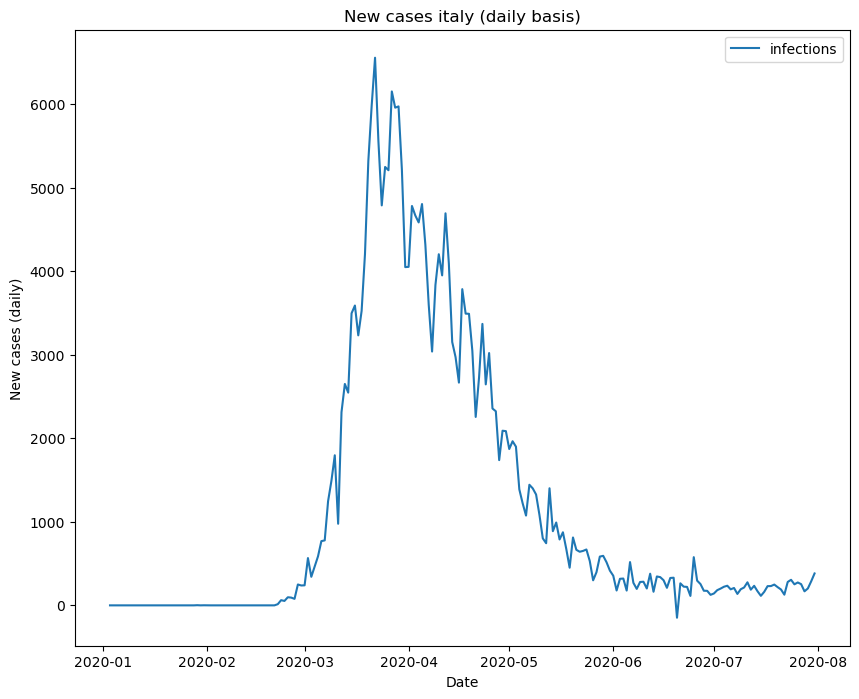

In [22]:
plt.figure(figsize=(10,8))
plt.plot(df_italy_correct_interval['Date_reported'], df_italy_correct_interval['New_cases'], label='infections')
plt.xlabel('Date')
plt.ylabel('New cases (daily)')
plt.title('New cases italy (daily basis)')
plt.legend()

To do comparison with wiki, we import also the dataset *aggregated_timeseries.json*

In [23]:
data_folder = './wiki_pageviews_covid/data/'
file_name = 'aggregated_timeseries.json'
df_WIKI = pd.read_json(data_folder+file_name)

In [24]:
df_WIKI_italy = pd.DataFrame.from_dict(df_WIKI['it'].topics)

**Q:** Which are the topics for which we have data of number of click on Wikipedia page?

In [25]:
df_WIKI_italy.columns

Index(['Culture.Biography.Biography*', 'Culture.Biography.Women',
       'Culture.Food and drink', 'Culture.Internet culture',
       'Culture.Linguistics', 'Culture.Literature', 'Culture.Media.Books',
       'Culture.Media.Entertainment', 'Culture.Media.Films',
       'Culture.Media.Media*', 'Culture.Media.Music', 'Culture.Media.Radio',
       'Culture.Media.Software', 'Culture.Media.Television',
       'Culture.Media.Video games', 'Culture.Performing arts',
       'Culture.Philosophy and religion', 'Culture.Sports',
       'Culture.Visual arts.Architecture',
       'Culture.Visual arts.Comics and Anime', 'Culture.Visual arts.Fashion',
       'Culture.Visual arts.Visual arts*', 'Geography.Geographical',
       'Geography.Regions.Africa.Africa*',
       'Geography.Regions.Africa.Central Africa',
       'Geography.Regions.Africa.Eastern Africa',
       'Geography.Regions.Africa.Northern Africa',
       'Geography.Regions.Africa.Southern Africa',
       'Geography.Regions.Africa.Western 

In [26]:
covid_click_IT = df_WIKI['it'].covid #getting the dictionary of covid page on Wikipedia

Now we build from the dictionary a Dataframe

In [27]:
covid_click_IT = pd.DataFrame.from_dict(covid_click_IT)

In [28]:
covid_click_IT.reset_index(inplace=True)

In [29]:
covid_click_IT = covid_click_IT.rename(columns = {'index':'Date'})

In [30]:
covid_click_IT['Date']=pd.to_datetime(covid_click_IT['Date'])

In [31]:
df_italy_correct_interval.head(-1)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
107532,2020-01-03,IT,Italy,EURO,0,0,0,0
107533,2020-01-04,IT,Italy,EURO,0,0,0,0
107534,2020-01-05,IT,Italy,EURO,0,0,0,0
107535,2020-01-06,IT,Italy,EURO,0,0,0,0
107536,2020-01-07,IT,Italy,EURO,0,0,0,0
...,...,...,...,...,...,...,...,...
107737,2020-07-26,IT,Italy,EURO,274,245864,5,35102
107738,2020-07-27,IT,Italy,EURO,254,246118,5,35107
107739,2020-07-28,IT,Italy,EURO,168,246286,5,35112
107740,2020-07-29,IT,Italy,EURO,202,246488,11,35123


In [32]:
time_click_IT=covid_click_IT.loc[covid_click_IT['Date']>='2020-01-03'] #selecting the data only in time we have also data on previous dataset

Text(0.5, 1.0, 'infections behavior vs wiki click on covid')

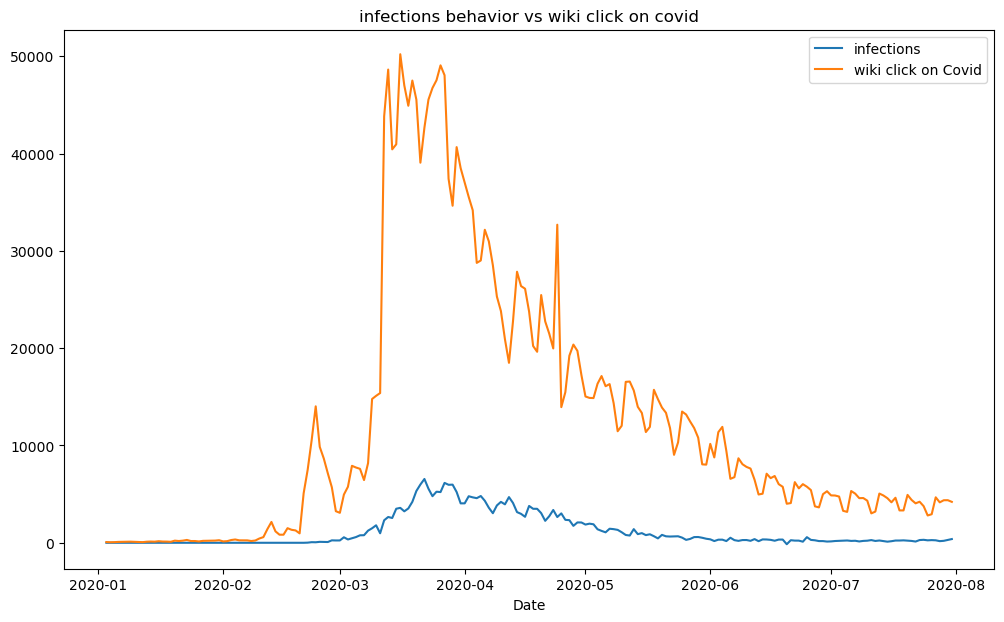

In [33]:
plt.figure(figsize=(12,7))
plt.plot(df_italy_correct_interval['Date_reported'],df_italy_correct_interval['New_cases'], label='infections')
plt.plot(time_click_IT['Date'],time_click_IT['sum'], label='wiki click on Covid')
plt.legend()
plt.xlabel('Date')
plt.title('infections behavior vs wiki click on covid')

In [34]:
df_italy_correct_interval

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
107532,2020-01-03,IT,Italy,EURO,0,0,0,0
107533,2020-01-04,IT,Italy,EURO,0,0,0,0
107534,2020-01-05,IT,Italy,EURO,0,0,0,0
107535,2020-01-06,IT,Italy,EURO,0,0,0,0
107536,2020-01-07,IT,Italy,EURO,0,0,0,0
...,...,...,...,...,...,...,...,...
107738,2020-07-27,IT,Italy,EURO,254,246118,5,35107
107739,2020-07-28,IT,Italy,EURO,168,246286,5,35112
107740,2020-07-29,IT,Italy,EURO,202,246488,11,35123
107741,2020-07-30,IT,Italy,EURO,288,246776,6,35129


In [35]:
df_italy_correct_interval['New_cases'].shape

(211,)

In [36]:
time_click_IT['sum'].shape

(211,)

In [37]:
df_for_regplot = df_italy_correct_interval.merge(time_click_IT,left_on='Date_reported', right_on='Date')

In [38]:
df_for_regplot.head(-1)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date,len,sum,percent
0,2020-01-03,IT,Italy,EURO,0,0,0,0,2020-01-03,33,75,0.000017
1,2020-01-04,IT,Italy,EURO,0,0,0,0,2020-01-04,33,54,0.000014
2,2020-01-05,IT,Italy,EURO,0,0,0,0,2020-01-05,33,65,0.000017
3,2020-01-06,IT,Italy,EURO,0,0,0,0,2020-01-06,33,90,0.000021
4,2020-01-07,IT,Italy,EURO,0,0,0,0,2020-01-07,33,96,0.000017
...,...,...,...,...,...,...,...,...,...,...,...,...
205,2020-07-26,IT,Italy,EURO,274,245864,5,35102,2020-07-26,33,2935,0.001113
206,2020-07-27,IT,Italy,EURO,254,246118,5,35107,2020-07-27,33,4672,0.001231
207,2020-07-28,IT,Italy,EURO,168,246286,5,35112,2020-07-28,33,4155,0.001151
208,2020-07-29,IT,Italy,EURO,202,246488,11,35123,2020-07-29,33,4372,0.001263


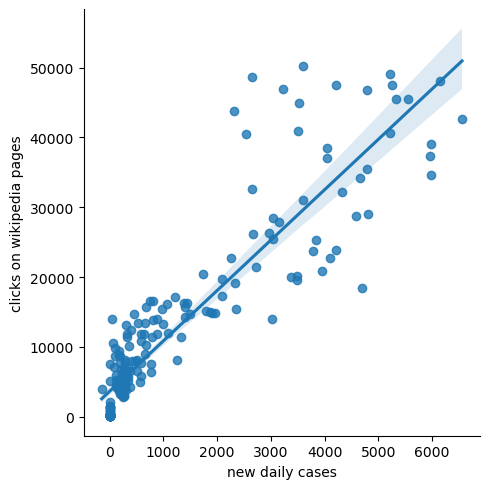

In [39]:
g = sns.lmplot(x = 'New_cases',y = 'sum', data = df_for_regplot )
g.set(xlabel = 'new daily cases', ylabel = 'clicks on wikipedia pages')

To have a better comparison of the shape of the two plot, we dcided to plot the data standardise (*min-max scaling*). In this way we can observe if the peaks occur at the same date and if the main peak occur at the same time for the two plot.

Text(0.5, 1.0, 'infections behavior vs wiki clicks on covid page behavior')

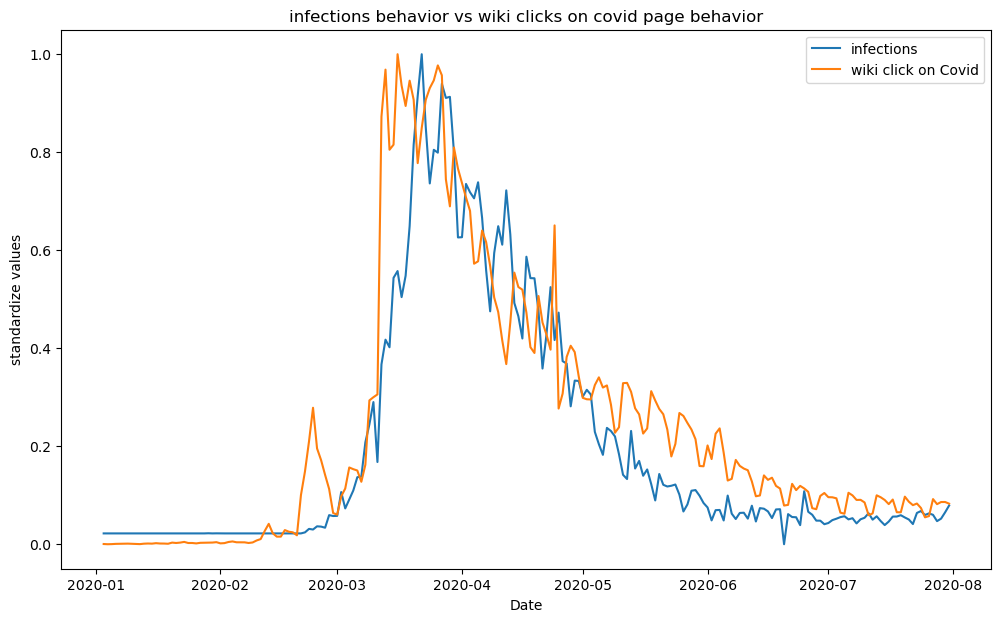

In [40]:
plt.figure(figsize=(12,7))
plt.plot(df_italy_correct_interval['Date_reported'], (df_italy_correct_interval['New_cases']-np.min(df_italy_correct_interval['New_cases']))/(np.max(df_italy_correct_interval['New_cases'])-np.min(df_italy_correct_interval['New_cases'])), label='infections')
plt.plot(time_click_IT['Date'],(time_click_IT['sum']-np.min(time_click_IT['sum']))/(np.max(time_click_IT['sum'])-np.min((time_click_IT['sum']))), label='wiki click on Covid')
plt.legend()
plt.xlabel('Date')
plt.ylabel('standardize values')
plt.title('infections behavior vs wiki clicks on covid page behavior')

It is really interesting observing that peaks of infections and peaks of wiki click on covid page are shifted in time. We will probably go further the motivation of this in milestone 3.

In [52]:
serbian_population = 6844000
italian_population = 59070000

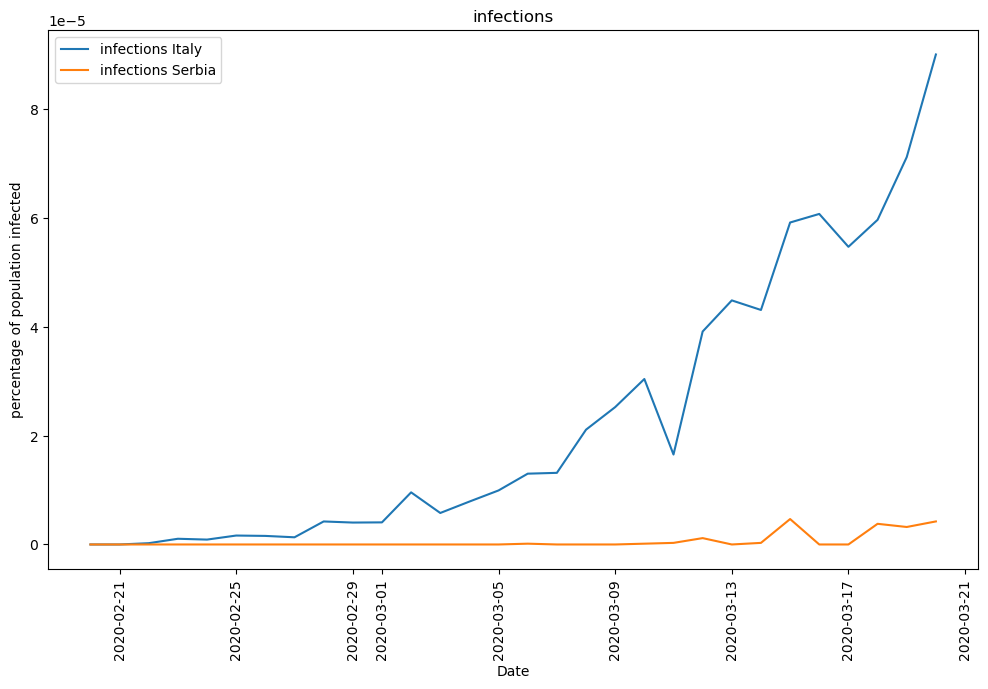

In [56]:
plt.figure(figsize=(12,7))
plt.plot(df_italy_riky['Date_reported'],df_italy_riky['New_cases']/italian_population, label='infections Italy')
plt.plot(df_serbia_riky['Date_reported'],df_serbia_riky['New_cases']/serbian_population, label='infections Serbia')
plt.legend()
plt.xlabel('Date')
plt.ylabel('percentage of population infected')
plt.title('infections')
plt.xticks(rotation = 90)
plt.show()